<a href="https://colab.research.google.com/github/dasgupsa/HeartDisease/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Heart Disease Prediction

This is my personal attempt at trying to utilise Machine Learning and Deep Learning techniques on  a real world dataset. This project is about predicting Heart Diseases in people using Machine Learning algorithms.

This is a binary classification problem and several different machine learning techniques will be used to assess the best performance.

The [dataset](https://www.kaggle.com/ronitf/heart-disease-uci) has been obtained from Kaggle but the original data can be found [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

The main aim is to try and understand the different techniques applied a small and simple dataset. By understanding these techniques fully, they can be applied with confidence to more complex problems.










### Key Terms

There are some terms, which will be used below and I wanted to explain their meaning to avoid ambiguity.

- Supervised Learning: we have input variables (x) and an output variable (y). We need to find an algorithm to learn the mapping function from the input to the output.
- Unsupervised Learning: there is only input data (x) and no corresponding output variable (y). The aim is to model the underlying structure or distribution in the data in order to learn more about the data.
- Hyperparameters: Algorithms have two types of parameters. There are parameters learnt during the process. The second type - "hyperparameters" are parameters set by the user before the learning process. The user can experiment with different values in order to find the best algorithm performance.
- Cross Validation: it's a technique where split the data into several parts. We tune our model on some parts of the data. We test the model's performance on the data which was kept aside. For more details, please refer to this [link]((https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html).
- [Log Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) - (logistic loss/cross-entropy loss) is used to evaluate the probability outputs of a classifier as opposed to its predictions. This is a popular metric in Kaggle competitions.
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) - determines the 
percentage of samples the algorithm was able to classify correctly.
- [Perfomance Measures - precision, recall, f1-score ](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/) - key measures which help us determine the quality of the algorithm's perfomance and help us compare with other algorithms performance.


### Load Libraries

In [0]:
#Standard Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
import xgboost as xgb

# Deep Learning Libraries
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# Analysing Results
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

Using TensorFlow backend.


### To do

For each technique - explain/ apply/hyperparameter/check accuracy

XGBoost

PCA

NN + Tensorboard

Summarise results

Write up each algo + make whole notebook look pretty.

### Loading data from Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/mydata/heart.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Roadmap

Every machine learning project has 4 main steps:

- **Data Collection**: obtaining the data.
- **Data Cleaning and Exploration**: the dataset needs to be checked for missing values, null/inappropriate values and steps must be taken (if needed) to organise the dataset for inputting into the models. 
- **Model Building & Results**: building and tuning machine learning models to maximise algorithm's performance.
- **Further Steps**: Assessing the results from the algorithms and deciding future steps. Are the results satisfactory and conclusive? Do we need to collect more data / tune exisiting models / search / develop other models to get a better result?

### Exploratory Data Analysis

In data science, it is important to analyse the dataset before using the  Machine Learning models. [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html) is an excellent Python library which has several in-built features to help us with data analysis. Some of the key pandas functions are:

- head: a brief overview of the first few rows of the dataframe.
- shape:  provides the number of rows and columns in the dataframe.
- describe: get various summary statistics.
- info: the number and type of value in each column.



In [0]:
# To understand the data better, let’s view the dataset. 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Size of dataset is (303, 14)


Text(0.5, 1.0, 'Target Class')

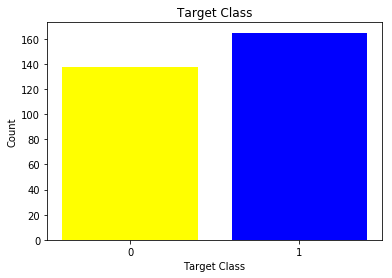

In [0]:
print("Size of dataset is", df.shape)

# We need to see how imbalanced the
plt.bar(df['target'].unique(), df['target'].value_counts(), color=['blue', 'yellow'])
plt.xticks([0,1])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class')

In [0]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
# The dataset has 303 rows and there are no missing values. 
# There are 13 features and one target column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [0]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

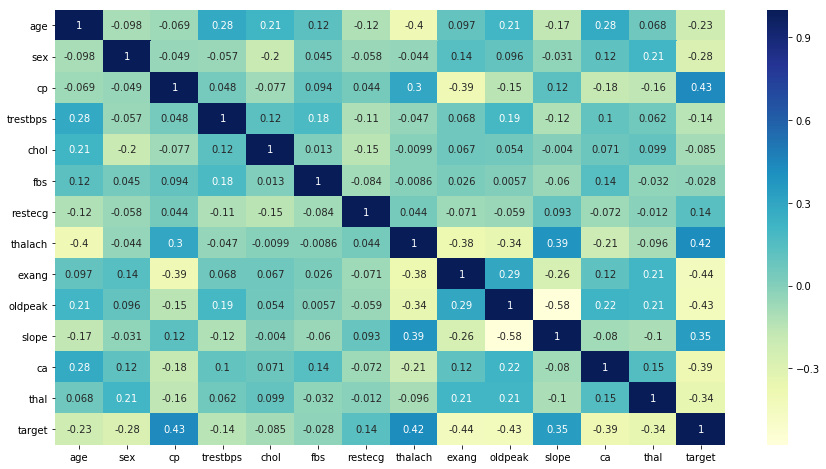

In [0]:
# Correlation heatmap
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

### Splitting up Dataset

The dataset needs to be split up into a training set and test set. There's a [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function available in Python which splits the data.

In [0]:
# Train 
ResultsData = [] # empty list to hold results from different algorithms
cv = 10 # number of folds to do in cross validation
X = df.iloc[:,:13] # dataset features 
y = df.iloc[:, 13] # labels

# Splitting dataset into training and test using Python in-built function
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=3)

The range of the features are quite different. For example, maximum value of the feature 'age' is 77 but for the feature 'cp' it is 3. 
For distance based algorithms like K-Nearest Neighbours, this disparity in values amongst different features, will have an effect on its performance. An [excellent article](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html) explains this topic in depth.

Hence, the dataset will be standardised in order to minimise any negative effects and maximise the algorithm's performance.

In [0]:
#Standardising the dataset. We standardise on training set ONLY and apply it to test set.
# We DO NOT want test data information "leaking" into the dataset.

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Machine Learning Techniques

- Different supervised machine learning techniques will be used to see whch model provides the best prediction. The techniques are:

  - K Nearest Neighbours (KNN)
  - Support Vector Machines (SVM)
  - Random Forest
  - Naive Bayes
  - Logistic Regression
  - XGBoost
  - Neural Networks
  - Ensembling

- Python has a very popular package [scikit-learn](https://scikit-learn.org/stable/) which has several machine learning libraries built in, ready for use. To study more about the sci-kit learn library and how it was built, please refer to this [paper](https://arxiv.org/abs/1309.0238).
- Sci-kit learn models are extremely user-friendly and have a simple logic of fitting the training data and predicting test data results.
- The default parameters will used mostly, apart from some hyperparameter tuning (discussed later on).
- For each of the models, the following will be done:
 - Instantiating the model.
 - Creating a list of hyperparameter values which need to be tuned.
 - Find the optimal hyperparameters and fit and train the model (with the optimal hyperparameters).
 - Three main classification metrics will be calculated to measure the algorithm's performance.
    - Log Loss
    - Accuracy
    - F1-score

### [K Nearest Neighbour (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- Explanation: 
 - It is a supervised, non - parametric method which can be used for classification or regression.
 - To explain briefly, an object is classified by a plurality vote of its neighbors. The object needs to be assigned to a class. The object is assigned to the class which is most common among its 'k' nearest neighbors . 
 - For example, if k = 3, two of the nearest three objects are of class 2 and one of the nearest three objects belongs to class 1. The object being assigned, will be assigned to class 2.
 - [Excellent article](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) explaining the inner workings of the algorithm.
- Hyperparameters: 
 - number of neighbours
 - distance measure - the sci-kit learn default is Euclidean and this will be used.


In [0]:
knn = KNeighborsClassifier() # Instantiating the model

#Hyperparameters
param_grid = {"n_neighbors": [5,10,15,20,25]}


#GridSearch CV to find the best hyperparameters
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv)
CV_knn.fit(X_train, y_train)

#CV_knn.best_params_: This is a dictionary which has the parameters with the best accuracy


# fit the model with training set and predict test set
knn = KNeighborsClassifier(n_neighbors=CV_knn.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_log_loss_pred = knn.predict_proba(X_test)
y_pred = knn.predict(X_test)

#Calculate and print the results metrics
logLoss = log_loss(y_test, y_log_loss_pred)
accuracy = accuracy_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
print("LogLoss is {0:.3f}".format(logLoss))
print("Accuracy is {0:.2f}%".format(accuracy * 100))
print("F1-Score is {0:.3f}".format(f1Score))

#Creating a list of results
li = []
li.append('KNN')
li.append(round(logLoss,4))
li.append(round (accuracy,4))
li.append(round (f1Score,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/svm.html)

- Explanation: 
  - Supervised algorithm which can perform linear and non-linear classification.
  - SVM tries to find a hyperplane that best divides the dataset into its different classes. It does this by maximising the "margin" between them.
  - SVM works with linearly separable and non-linearly separable cases. For non-linearly separable cases, it has a "kernel" trick
  - To study about the math, please read this [article](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/).
  
- Hyperparameters: 
  - C:  penalty parameter of the error term.
  - kernel: the kernel type to be used. The main kernels are radial basis function (rbf) and linear.
  - gamma: the kernel coefficient

In [0]:
svmModel = SVC() # Instantiating the model

#Hyperparameters
parameters = [{'kernel':['rbf'],
              'gamma':[1e-4, 1e-3, 0.01, 0.1, 0.2],
              'C':[1,10,20,30,50,60,100]},
             {'kernel':['linear'], 'C':[1,10,100]}]

#GridSearch CV to find the best hyperparameters
clf = GridSearchCV(svmModel, parameters, cv=cv)
clf.fit(X_train,y_train)

#clf.best_params_: This is a dictionary which has the parameters with the best accuracy

svc = SVC(C= clf.best_params_['C'], 
          kernel= clf.best_params_['kernel'],
          gamma = clf.best_params_['gamma'],
          probability=True)

# fit the model with training set and predict test set
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_log_loss_pred = svc.predict_proba(X_test)

#Calculate and print the results metrics
accuracy = accuracy_score(y_test, y_pred)
logLoss = log_loss(y_test, y_log_loss_pred)
f1Score = f1_score(y_test, y_pred)
print("LogLoss is {0:.3f}".format(logLoss))
print("Accuracy is {0:.2f}%".format(accuracy * 100))
print("F1-Score is {0:.3f}".format(f1Score))

#Creating a list of results
li = []
li.append('SVM')
li.append(round(logLoss,4))
li.append(round (accuracy,4))
li.append(round (f1Score,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

LogLoss is 0.355
Accuracy is 87.10%
F1-Score is 0.900


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- Explanation: 
 - It is a supervised classification algorithm.
- Hyperparameters:  
 - Penalty: specifies the norm used in the penalization - l1 or l2.
 - C: Inverse of regularization strength. Lower the value, higher the regularisation strength.

In [0]:
logRegModel = LogisticRegression() # Instantiating the model

#Hyperparameters
penalty = ['l1', 'l2']
C = np.linspace(1, 20, 3)
hyperparameters = dict(C=C, penalty=penalty)

#GridSearch CV to find the best hyperparameters
logreg_cv = GridSearchCV(logRegModel, hyperparameters, cv=cv)
logreg_cv.fit(X_train,y_train)

# logreg_cv.best_params_ - dictionary which contains the hyperparameters with the best results

lr = LogisticRegression(C = logreg_cv.best_params_['C'], penalty=logreg_cv.best_params_['penalty'])

# fit the model with training set
lr.fit(X_train, y_train)
y_log_loss_pred = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

#Calculate and print the results metrics
logLoss = log_loss(y_test, y_log_loss_pred)
accuracy = accuracy_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
print("LogLoss is {0:.3f}".format(logLoss))
print("Accuracy is {0:.2f}%".format(accuracy * 100))
print("F1-Score is {0:.3f}".format(f1Score))

#Creating a list of results
li = []
li.append('Logistic Regression')
li.append(round(logLoss,4))
li.append(round (accuracy,4))
li.append(round (f1Score,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)



LogLoss is 0.388
Accuracy is 87.10%
F1-Score is 0.900


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

### [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

- Explanation: 
 - Supervised algorithm which is based on Bayes Theorem. 
 - A key assumption is that all the features are independent. This is definitely not always the case. Hence, the name "Naive".
 - [Article](https://towardsdatascience.com/unfolding-na%C3%AFve-bayes-from-scratch-2e86dcae4b01) explaining the inner workings of Naive Bayes.
- Hyperparameters: 
 - No hyperparameters.


In [0]:
nb = GaussianNB() # Instantiating the model

# fit the model with training set
nb.fit(X_train, y_train)
y_log_loss_pred = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

#Calculate and print the results metrics
logLoss = log_loss(y_test, y_log_loss_pred)
accuracy = accuracy_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
print("LogLoss is {0:.3f}".format(logLoss))
print("Accuracy is {0:.2f}%".format(accuracy * 100))
print("F1-Score is {0:.3f}".format(f1Score))

#Creating a list of results
li = []
li.append('Naive Bayes')
li.append(round(logLoss,4))
li.append(round (accuracy,4))
li.append(round (f1Score,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

LogLoss is 0.390
Accuracy is 87.10%
F1-Score is 0.900


### [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Explanation: 
 - This is an ensemble method. 
- Hyperparameters: 
  -  N_estimators 
  - Max_depth 
  - Min_samples_split 
  - Min_samples_leaf 
  - Max Features
- Feature Importance:
 - Random Forests in sci-kit learn have a good inbuilt feature called feature importance. This tells us how important each feature was for making the split in the trees. For very large datasets, with several features, to minimise computational speed we may choose only the features with most importance. This may help reduce computational speed with hopefully minimal impact on accuracy.

In [0]:
rfc = RandomForestClassifier() # Instantiating the model
 
# Hyperparameters
param_grid = {"n_estimators": [10, 18, 22,30, 40, 50, 60, 70],
              "max_depth": [3, 5],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}

#GridSearch CV to find the best hyperparameters
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= cv)
CV_rfc.fit(X_train,y_train)

# This is a dictionary with the hyperparameters which produced the best result.
CV_rfc.best_params_

rfc = RandomForestClassifier(n_estimators= CV_rfc.best_params_['n_estimators'], 
                             max_depth= CV_rfc.best_params_['max_depth'],
                             max_leaf_nodes = CV_rfc.best_params_['max_leaf_nodes'], 
                             min_samples_leaf = CV_rfc.best_params_['min_samples_leaf'],
                             min_samples_split= CV_rfc.best_params_['min_samples_split'], 
                             min_weight_fraction_leaf= CV_rfc.best_params_['min_weight_fraction_leaf'])


# fit the model with training set
rfc.fit(X_train, y_train)
y_log_loss_pred = rfc.predict_proba(X_test)
y_pred = rfc.predict(X_test)

#Calculate and print the results metrics
logLoss = log_loss(y_test, y_log_loss_pred)
accuracy = accuracy_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
print("LogLoss is {0:.3f}".format(logLoss))
print("Accuracy is {0:.2f}%".format(accuracy * 100))
print("F1-Score is {0:.3f}".format(f1Score))

#Creating a list of results
li = []
li.append('Random Forest')
li.append(round(logLoss,4))
li.append(round (accuracy,4))
li.append(round (f1Score,4))

#Appending to main List for Comparison purposes
ResultsData.append(li)

LogLoss is 0.394
Accuracy is 80.65%
F1-Score is 0.850


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Feature importances can give you a sense of which of your variables have the most effect in these models. You can use that information to engineer new features, drop out features that look like noise, or just to inform you as you continue building models.


Decision trees, and the ensemble methods that are built on them, work by splitting the data into subsets which most heavily belong to one class. The tree will continue to build different subsets until it understands and represents the relationship of the variables with the target. 

Tree methods calculate their splits by mathematically determining which split will most effectively help distinguish the classes. Sklearn instances of these models have a .feature_importances_ attribute, which returns an array of each feature’s importance in determining the splits.

In [0]:
# all columns except for 'target'
feature_importance = rfc.feature_importances_
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = df.columns[:-1].values,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
cp,0.192558
thal,0.156644
oldpeak,0.128763
slope,0.126627
exang,0.102556
ca,0.099206
thalach,0.092281
age,0.048308
sex,0.026991
trestbps,0.015229


### [XGBoost](https://xgboost.readthedocs.io/en/latest/)
- Explanation: 
 - This is a gradient boosting method, which has proven to be very popular due to its good performance.
 - [Explanation](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/) of the math behind XGBoost.
 - [Examples of Xgboost in Python](https://github.com/dmlc/xgboost/tree/master/demo/guide-python)
 - There are two ways to access XGBoost. The sklearn api or the native api. 

- Hyperparameters: 

 - learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1] 
 - max_depth: tree depth allowed during any boosting round. 
  - subsample: percentage of samples used per tree. 
  - colsample_bytree: percentage of features used per tree. 
  - n_estimators: number of trees to build. 
  - objective: loss function to use, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.  
 - gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners. 
 - alpha: L1 regularization on leaf weights. 
 - lambda: L2 regularization on leaf weights. 












https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

http://www.fantasyfutopia.com/python-for-fantasy-football-random-forest-and-xgboost-hyperparameter-tuning/

https://www.dataiku.com/learn/guide/code/python/advanced-xgboost-tuning.html



In [0]:
# XGBoost is slightly different to the other classifiers in terms of implementation
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Accuracy: 87.10%
Misclassified samples: 4


In [0]:
# https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html
# KEY: https://jessesw.com/XG-Boost/

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="error", as_pandas=True, seed=123)

In [0]:
cv_results.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.306931,0.018523,0.306931,0.037046
1,0.270627,0.024364,0.333334,0.012349
2,0.229373,0.051974,0.283829,0.024697
3,0.214521,0.022984,0.234324,0.025987
4,0.183168,0.004042,0.214522,0.049395


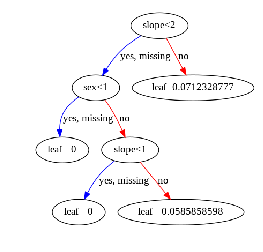

In [0]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

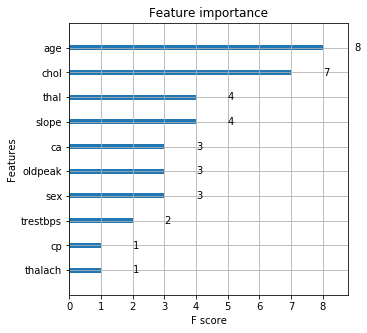

In [0]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

### Principal Component Analysis (PCA)

- An extremely popular technique for dimensionality reduction especially when working with large datasets with large number of features.
- An [excellent article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) explaining the intuitive aspects of PCA.

In [0]:
pca = PCA(0.9)
principalComponents = pca.fit_transform(X_train)
pca.explained_variance_ratio_
pca.n_components_
# to keep 95% of the variance, we still need to have 12 of the components.
# If I drop to 90% of the variance, we can drop to 11 components
# Hence, no dimensionality reduction is done and we keep all features.

### [Neural Networks](http://neuralnetworksanddeeplearning.com/)

 - Explanation: Deep learning are techniques, supposedly based on human neuron system, which can help improve on machine learning techniques. There are many deep learning libraries including [Pytorch](https://pytorch.org/) and [Tensorflow](https://www.tensorflow.org/) which have inbuilt models. There is a higher level library called [Keras](https://keras.io/) which is a wrapper on top of Tensorflow. 
All the models here are built using Keras.

- Hyperparameters: 
 - number of hidden layers, neurons in each hidden layer
 - dropout, activation function, batch size, 
 - loss function, optimiser
 - An extensive [article](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) which covers all the hyperparameters

In [0]:
batch_size = 1
epochs = 5 # An epoch is an iteration over the entire data set.

# Small Neural Network
classifier = Sequential()
classifier.add(Dense(12, activation='relu', input_shape=(13,)))
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6))
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))
classifier.summary()

#Compile Method. There are 3 inputs

# Loss Function: This is a binary classification problem. Hence, use binary_crossentropy is used 
# to calculate the loss function between the actual output and the predicted output.

# Optimiser: There are several options, but the recommended one is Adam (Adaptive moment estimation)
# Adam is a combination of RMSProp + Momentum.

# Metrics: Accuracy is the metric to measure model performance


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier_train = classifier.fit(X_train, y_train, batch_size=batch_size,
                                 epochs=epochs, verbose=1)

W0714 16:51:11.981240 140153638320000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


W0714 16:51:12.226079 140153638320000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.6983 - acc: 0.4412
Epoch 2/5
272/272 [==============================] - 0s 49us/step - loss: 0.6953 - acc: 0.5074
Epoch 3/5
272/272 [==============================] - 0s 42us/step - loss: 0.6927 - acc: 0.5368
Epoch 4/5
272/272 [==============================] - 0s 48us/step - loss: 0.6905 - acc: 0.5809
Epoch 5/5
272/272 [==============================] - 0s 40us/step - loss: 0.6885 - acc: 0.6287


In [0]:
# We calculate the loss & accuracy value for the model in test mode using the evaluate function
test_eval = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.681240439414978
Test accuracy: 0.8064516186714172


### Comparison

The table below shows the performance of all the different classifiers

In [0]:
#https://datascience.stackexchange.com/questions/26333/convert-a-list-of-lists-into-a-pandas-dataframe
data = [['New York Yankees', 'Acevedo Juan', 900000, 'Pitcher'], 
['New York Yankees', 'Anderson Jason', 300000, 'Pitcher'], 
['New York Yankees', 'Clemens Roger', 10100000, 'Pitcher'], 
['New York Yankees', 'Contreras Jose', 5500000, 'Pitcher']]

df = pd.DataFrame(data)
df.columns = ["Algorithm", "Log Loss", "Accuracy", "F1 Score"]
df



In [0]:
# When comparing F1 data - breaking down into classific etc might be good idea

# For more graphical and tabular views one can use 
# classification report / confusion matrix / ROC curve
# but for saving space, such methods were not used

#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


### Conclusion

## Summary

- Possible feature engineering could be could to try and obtain better accuracy.
- A very popular technique for increasing accuracy especially in Kaggle competitions is ensembling. 
- This is a very small dataset. In order to develop conclusive results, we need to get more data to further test our algorithms.